# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

1.
loaded data set from data folder


2.
(3798, 63)
The dimensions are 3798 rows or observations, and 63 columns or variables. The variables included are: 
       'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere

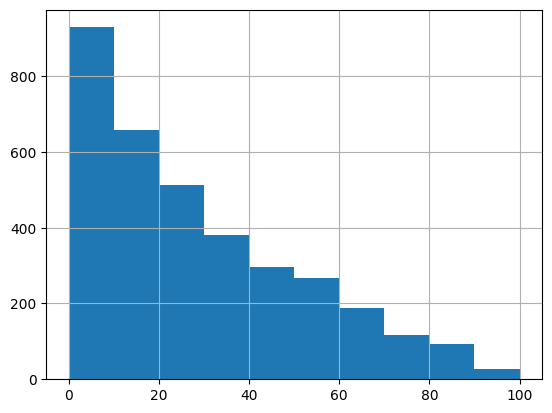

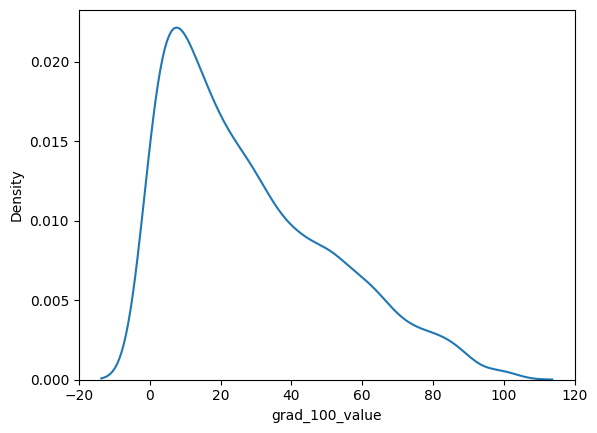

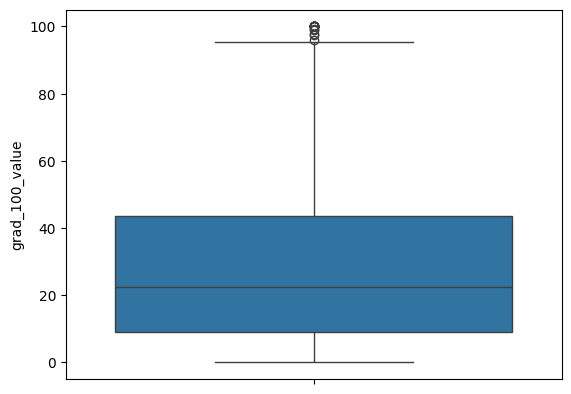

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


5.


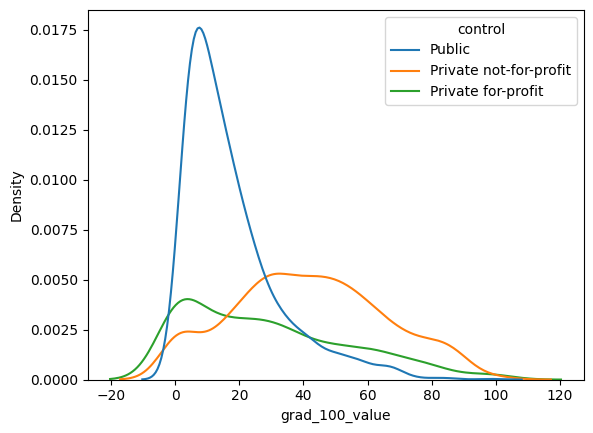

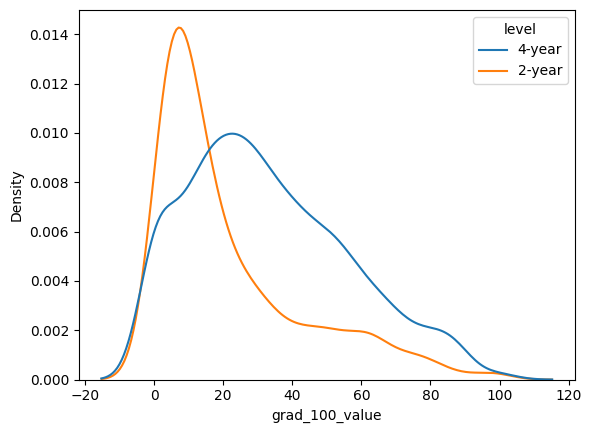

I see that the density of grad_100_values by control values vary. For the public control, the density is more concentrated towards lower percentages, 
while the densities for the other 2 controls appear more 'spread out' over -20 to 80 percentage. This might mean that public institutions usually see 
a lower completion rate compared to that of the other 2 institution types.

For the KDE by level, the densities for the 2-year institutions appear more concentrated to the lower numbers, while the 4-year institutions 
appear more evenly distributed across-20 to 80 percentage. This might mean there's a lower probability of completing a 2-year program versus that 
of a 4-year problem.
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.

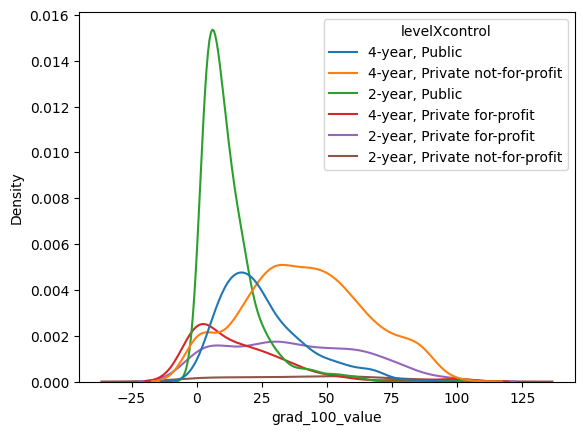

Based on the graph, I believe 4-year private not-for-profit institutions have the highest completion rate since the majority of the 
distributions are higher compared to that of the other institutions.


7.


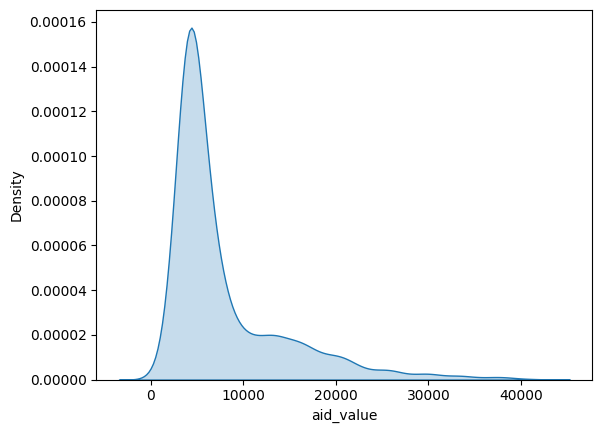

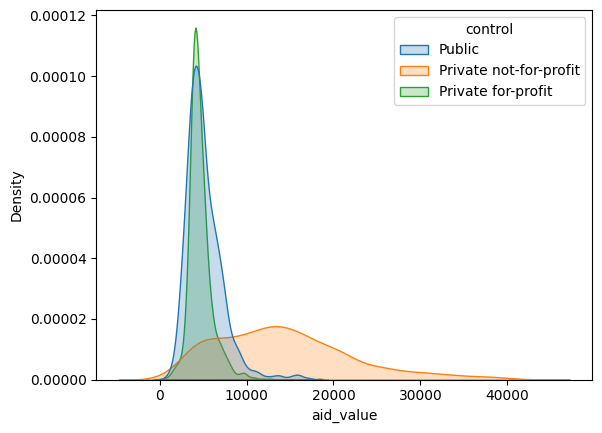

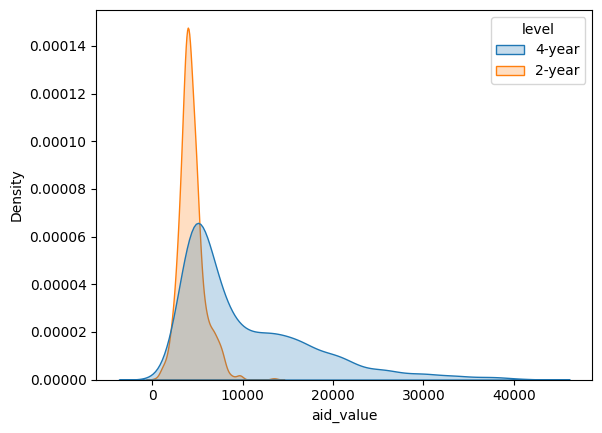

It appears that the majority of this 'peak' is contributed by the private for-profit and public institutions on the control side, 
and the 2-year institutions on the level side. 
 
                         count          mean          std    min      25%  \
control                                                                     
Private for-profit       991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit  1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                  1558.0   5094.835687  2136.436370  881.0  3725.25   

                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
         count          mean          std    min     25%     50%      75%  \
level                                                                       
2-year  1458.0   43

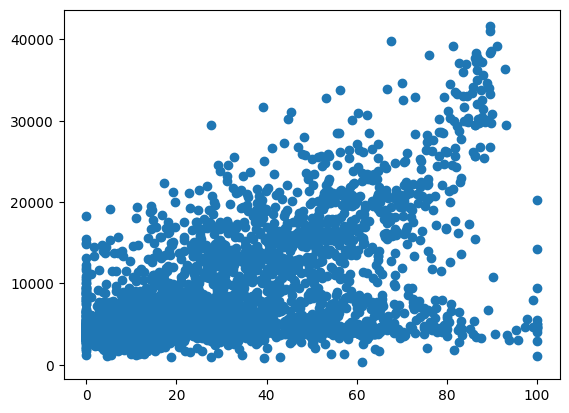

I see a lot of points remaining closer to 0, then dispersing out towards 100 along the grad_100_value x-axis and towards the 40000 aid_value y-axis. 
On this y-axis incline, it appears positively correlated, as the highest points are when the x is greater.


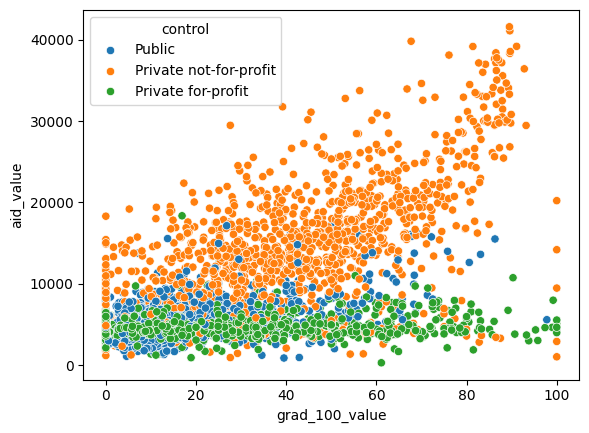

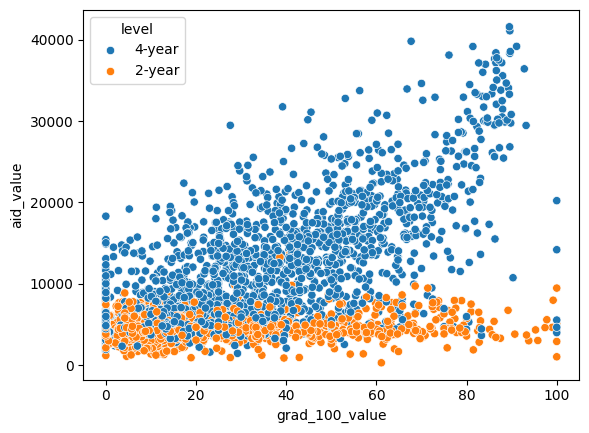

I see that the 4 year institutions and the private non-for-profit represent more of the values of graduation rates and aid value increasing near 
the top of the graph. This aligns with what we've thought in the past by other statistical analyses.
It seems 4 year institutions and private non-for-private institutions have higher graduation rates as aid values increase. Public appears to have a slight increase, but not as prominent.


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#1.
print("1.")
college_data = pd.read_csv("./data/college_completion.csv")
print("loaded data set from data folder\n\n")


#2. 
print("2.")
print(college_data.shape)
print("""The dimensions are 3798 rows or observations, and 63 columns or variables. The variables included are: 
       'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
       'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer',
       'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer',
       'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer',
       'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer',
       'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames',
       'cohort_size'""")
print(college_data.head())


#3. 
print("\n\n3.")
cross_control_level = pd.crosstab(college_data['control'], college_data['level'])
print(cross_control_level)
print("I see that a lot more observations from 4 year institutions are in the private not-for-profit control versus the other 2 controls, \nand observations from 2-year institutions are the least in private not-for-profit controls versus that in the other 2 controls. I also notice that, \ndisregarding the private not-for-profit control, the number in private for-profit is less in both institution levels than the public control.")


#4. 
print("\n\n4.")
college_data['grad_100_value'].hist()
plt.show()
sns.kdeplot(college_data['grad_100_value'])
plt.show()
sns.boxplot(college_data['grad_100_value'])
plt.show()
print(college_data['grad_100_value'].describe())


#5. 
print("\n\n5.")
sns.kdeplot(data=college_data, x="grad_100_value", hue="control")
plt.show()
sns.kdeplot(data=college_data, x="grad_100_value", hue="level")
plt.show()
print("""I see that the density of grad_100_values by control values vary. For the public control, the density is more concentrated towards lower percentages, \nwhile the densities for the other 2 controls appear more 'spread out' over -20 to 80 percentage. This might mean that public institutions usually see \na lower completion rate compared to that of the other 2 institution types.\n""")
print("""For the KDE by level, the densities for the 2-year institutions appear more concentrated to the lower numbers, while the 4-year institutions \nappear more evenly distributed across-20 to 80 percentage. This might mean there's a lower probability of completing a 2-year program versus that \nof a 4-year problem.""")

control_group = college_data.groupby('control')
print(control_group['grad_100_value'].describe())
level_group = college_data.groupby('level')
print(level_group['grad_100_value'].describe())
print("It appears that, for the control, the private for-profit and private not-for-profit controls have higher mean completion rates than the public control. \nFor the level, the 4-year institutions have a higher mean completion rate than the 2-year institutions. I got this because the controls for \npublic have lower statistics in the %'s and mean, even though the min and max are around the same. This logic also applies for the level groupings.")


#6.
print("\n\n6.")
college_data['levelXcontrol']=college_data['level']+', '+college_data['control']
sns.kdeplot(data=college_data, x="grad_100_value", hue="levelXcontrol")
plt.show()
print("Based on the graph, I believe 4-year private not-for-profit institutions have the highest completion rate since the majority of the \ndistributions are higher compared to that of the other institutions.")


#7.
print("\n\n7.")
sns.kdeplot(data=college_data, x="aid_value", fill=True)
plt.show()
sns.kdeplot(data=college_data, x="aid_value", hue='control', fill=True)
plt.show()
sns.kdeplot(data=college_data, x="aid_value", hue='level', fill=True)
plt.show()
print("It appears that the majority of this 'peak' is contributed by the private for-profit and public institutions on the control side, \nand the 2-year institutions on the level side. \n ")

aid_control_group = college_data.groupby('control')
print(aid_control_group['aid_value'].describe())
aid_level_group = college_data.groupby('level')
print(aid_level_group['aid_value'].describe())


#8. 
print("\n\n8.")
plt.scatter(college_data['grad_100_value'], college_data['aid_value'])
plt.show()
print("I see a lot of points remaining closer to 0, then dispersing out towards 100 along the grad_100_value x-axis and towards the 40000 aid_value y-axis. \nOn this y-axis incline, it appears positively correlated, as the highest points are when the x is greater.")

sns.scatterplot(data=college_data, x="grad_100_value", y="aid_value", hue="control")
plt.show()
sns.scatterplot(data=college_data, x="grad_100_value", y="aid_value", hue="level")
plt.show()
print("I see that the 4 year institutions and the private non-for-profit represent more of the values of graduation rates and aid value increasing near \nthe top of the graph. This aligns with what we've thought in the past by other statistical analyses.")

print("It seems 4 year institutions and private non-for-private institutions have higher graduation rates as aid values increase. Public appears to have a slight increase, but not as prominent.")

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.